In [1]:
from __future__  import print_function, division
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


IDEA : Young people are more likely to be subscribers of Citibike.

NULL HYPOTHESIS : The average age of the subscribers is the same or higher than the average age of the customers.

ALTERNATIVE HYPOTHESIS: The average age of subscibers is significantly lesser than the average age of the customers.

H0: $\frac{\sum{Age_{\mathrm{Subsciber}}}}{\sum{Total_{\mathrm{Subsciber}}}} >= \frac{\sum{Age_{\mathrm{Customer}}}}{\sum{Total_{\mathrm{Customer}}}}$

H1: $\frac{\sum{Age_{\mathrm{Subsciber}}}}{\sum{Total_{\mathrm{Subsciber}}}} < \frac{\sum{Age_{\mathrm{Customer}}}}{\sum{Total_{\mathrm{Customer}}}}$

I will use a significance level  $\alpha=0.05$


In [2]:
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ks5063/PUIdata


In [3]:
#create the env variable if missing
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/ks5063/PUIdata


In [4]:
!curl -O https://s3.amazonaws.com/tripdata/JC-201806-citibike-tripdata.csv.zip
#os.system("curl -O https://s3.amazonaws.com/tripdata/JC-201806-citibike-tripdata.csv.zip")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1053k  100 1053k    0     0  3787k      0 --:--:-- --:--:-- --:--:-- 3789k


In [5]:
!unzip JC-201806-citibike-tripdata.csv.zip

Archive:  JC-201806-citibike-tripdata.csv.zip
  inflating: JC-201806-citibike-tripdata.csv  


In [6]:
#os.system("mv " + "JC-201806-citibike-tripdata.zip " + os.getenv("PUIDATA")
!mv JC-201806-citibike-tripdata.csv $PUIDATA         

In [7]:
!ls $PUIDATA

campaign_contributions.csv	 nypl_bronx.csv
JC-201806-citibike-tripdata.csv  times.txt


In [8]:
df = pd.read_csv(os.getenv("PUIDATA") + "/JC-201806-citibike-tripdata.csv")

In [9]:
df.head(10)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,329,2018-06-01 07:07:00.2990,2018-06-01 07:12:30.2220,3183,Exchange Place,40.716247,-74.033459,3276,Marin Light Rail,40.714584,-74.042817,29513,Subscriber,1991,1
1,259,2018-06-01 08:24:43.8490,2018-06-01 08:29:03.8450,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,26221,Subscriber,1989,2
2,686,2018-06-01 09:17:49.5730,2018-06-01 09:29:16.1770,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,29266,Subscriber,1990,1
3,164,2018-06-01 09:44:00.4020,2018-06-01 09:46:44.6830,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,29472,Subscriber,1993,1
4,769,2018-06-01 09:59:28.7800,2018-06-01 10:12:18.6660,3183,Exchange Place,40.716247,-74.033459,3203,Hamilton Park,40.727596,-74.044247,33679,Subscriber,1977,1
5,256,2018-06-01 10:33:02.1100,2018-06-01 10:37:18.1230,3183,Exchange Place,40.716247,-74.033459,3267,Morris Canal,40.712419,-74.038526,29269,Subscriber,1984,1
6,267,2018-06-01 11:33:22.6440,2018-06-01 11:37:50.0350,3183,Exchange Place,40.716247,-74.033459,3481,York St,40.716490,-74.041050,29551,Subscriber,1988,1
7,258,2018-06-01 12:07:49.8830,2018-06-01 12:12:08.0190,3183,Exchange Place,40.716247,-74.033459,3186,Grove St PATH,40.719586,-74.043117,26271,Subscriber,1976,1
8,1247,2018-06-01 12:53:24.8470,2018-06-01 13:14:11.8770,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,30987,Subscriber,1976,1
9,761,2018-06-01 13:21:09.2160,2018-06-01 13:33:50.9930,3183,Exchange Place,40.716247,-74.033459,3194,McGinley Square,40.725340,-74.067622,33659,Subscriber,1989,1


In [10]:
df_rd = df[['usertype','birth year']]

In [11]:
df_rd.head()

,usertype,birth year
0,Subscriber,1991
1,Subscriber,1989
2,Subscriber,1990
3,Subscriber,1993
4,Subscriber,1977


In [12]:
df_rd['age'] = df_rd['birth year'].map(lambda x : 2018 - int(x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
df_rd.head()

,usertype,birth year,age
0,Subscriber,1991,27
1,Subscriber,1989,29
2,Subscriber,1990,28
3,Subscriber,1993,25
4,Subscriber,1977,41


In [14]:
sfind = ((df_rd['usertype'] == 'Subscriber') & (df_rd['age'] < 100))
cfind = ((df_rd['usertype'] == 'Customer') & (df_rd['age'] < 100))

In [15]:
df_cus=df_rd.loc[cfind]
df_sub=df_rd.loc[sfind]

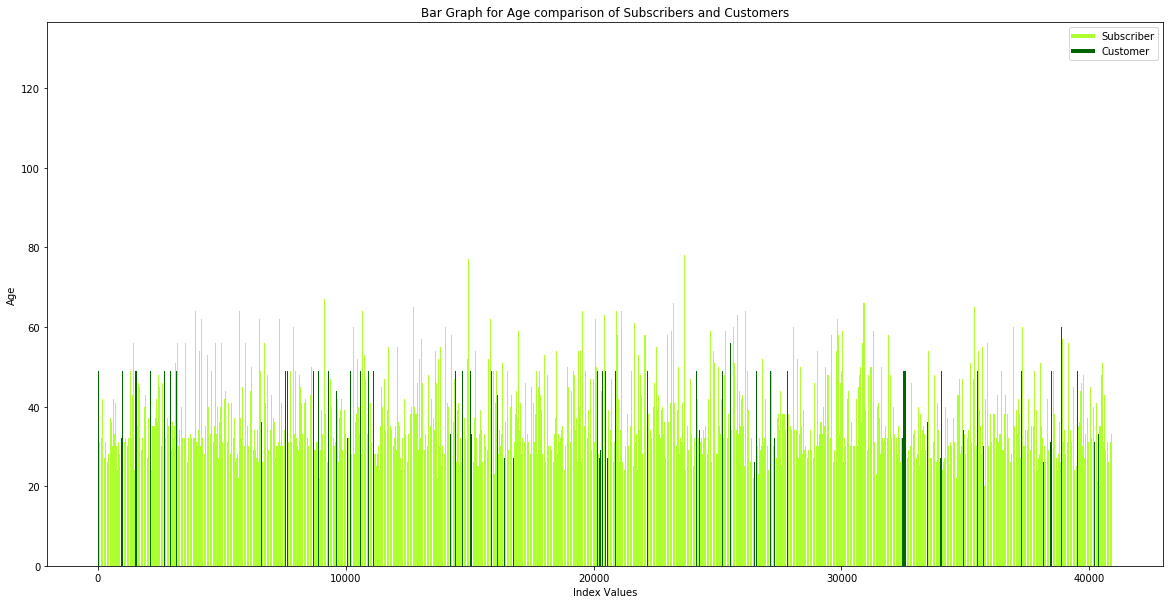

In [20]:
color_map = df_rd['usertype'].map(lambda x: '#ADFF2F' if x=="Subscriber" else '#006400')
plt.figure(figsize=(20,10))
plt.bar(df_rd.index.values,df_rd['age'],color=color_map)
plt.xlabel('Index Values')
plt.ylabel('Age')

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='#ADFF2F', lw=4, label='Subscriber'),Line2D([0], [0], color='#006400', lw=4, label='Customer')]

plt.legend(handles=legend_elements, loc='upper right')
plt.title("Bar Graph for Age comparison of Subscribers and Customers")

plt.show()

Figure 1: Distribution of the Citibike users by their usertype in the various age groups.

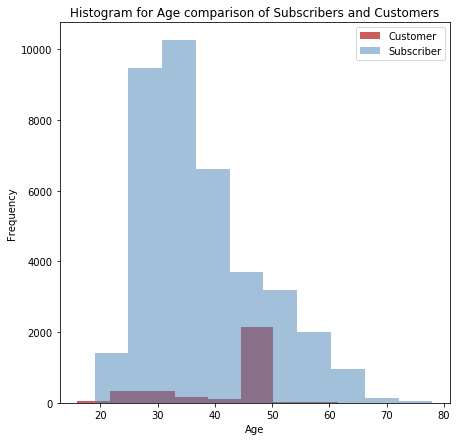

In [21]:
plt.figure(figsize=(7,7))
plt.hist(df_cus['age'], bins = 10, color = 'IndianRed', label='Customer')
plt.hist(df_sub['age'], bins = 10, color = 'SteelBlue', alpha=0.5, label='Subscriber')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Histogram for Age comparison of Subscribers and Customers")
plt.show()

Figure 2: Distribution of the Citibike users by their usertype in the various age groups.